In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

from src.data_visualization import create_map_with_comparison, plot_highlighted_bars_seaborn

# Data Analysis and Visualization

From a coding perspective, the streamlit up main function is implemented in the `rainfall_analysis.py` scrpit. The script loads custom built data management and visualization functions stored in two `.py` files: `data_management.py` and `data_visualization.py`, both located in the `src` folder.

For data management functions are:
- `load_data(fname_yearly_mean, fname_yearly_points)`
- `process_data_for_year(selected_year, london_yearly_mean, puglia_yearly_points, london_yearly_points)`

For data visualization functions are:

- `plot_highlighted_bars_plotly(df_plot, selected_year=None, figsize=(900, 500))`
- `plot_highlighted_bars(df_plot, selected_year=None, figsize=(12, 6))`
- `plot_highlighted_bars_seaborn(df_plot, selected_year=None, figsize=(12, 6))`
- `create_dual_map_comparison_plotly(df1, df2, tp_threshold1, tp_threshold2, zoom_start1=8.5, zoom_start2=8.5, min_radius1=3, max_radius1=15, min_radius2=3, max_radius2=15, title1="Map 1", title2="Map 2")`
- `create_interactive_plot(df_plot)`
- `create_map_with_comparison(df, tp_threshold, zoom_start=8.5, min_zoom=8.5, min_radius=3, max_radius=15)`
- `create_map_with_comparison_plotly(df, tp_threshold, zoom_start=8.5, min_radius=3, max_radius=15)`

Most of the functions are not used in the main script but can be helpful in case we need to debug or recreate them in a jupyter notebook for different analysis.


In [2]:
def location_year_min_max(df, year = 2018):
    df_year = df[df['year'] == year]

    tp_min = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].min()]['yearly_tp_mm'].values[0]
    lat_min = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].min()]['latitude'].values[0]
    lon_min = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].min()]['longitude'].values[0]

    tp_max = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].max()]['yearly_tp_mm'].values[0]
    lat_max = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].max()]['latitude'].values[0]
    lon_max = df_year[df_year['yearly_tp_mm'] == df_year['yearly_tp_mm'].max()]['longitude'].values[0]

    min = (tp_min, lat_min, lon_min)
    max = (tp_max, lat_max, lon_max)

    return min, max

In [3]:
london_yearly_mean = pd.read_parquet('./data/data_london_yearly_mean.parquet')
puglia_yearly_mean = pd.read_parquet('./data/data_puglia_yearly_mean.parquet')

london_yearly_mean = london_yearly_mean[london_yearly_mean['year'] > london_yearly_mean['year'].min()].copy()
puglia_yearly_mean = puglia_yearly_mean[puglia_yearly_mean['year'] > puglia_yearly_mean['year'].min()].copy()

In [8]:
london_yearly_points = pd.read_parquet('./data/data_london_yearly_sum_all_points.parquet')
london_yearly_points = london_yearly_points[london_yearly_points['year'] > 2009].copy()
london_yearly_points['coordinates'] = list(zip(london_yearly_points['latitude'], london_yearly_points['longitude']))
london_yearly_points['coordinates_str'] = london_yearly_points['latitude'].astype(str) + ',' + london_yearly_points['longitude'].astype(str)

puglia_yearly_points =pd.read_parquet('./data/data_puglia_yearly_sum_all_points.parquet')
puglia_yearly_points = puglia_yearly_points[puglia_yearly_points['year'] > 2009].copy()
puglia_yearly_points['coordinates'] = list(zip(puglia_yearly_points['latitude'], puglia_yearly_points['longitude']))
puglia_yearly_points['coordinates_str'] = puglia_yearly_points['latitude'].astype(str) + ',' + puglia_yearly_points['longitude'].astype(str)


puglia_yearly_points.to_parquet('./data/puglia_yearly_points.parquet')
london_yearly_points.to_parquet('./data/london_yearly_points.parquet')


In [9]:
puglia_yearly_points

,year,yearly_tp_mm,latitude,longitude,coordinates,coordinates_str
1,2010,752.0,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
2,2011,518.8,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
3,2012,766.4,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
4,2013,639.0,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
5,2014,734.1,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
...,...,...,...,...,...,...
12,2021,573.7,41.2,16.2,"(41.19999999999999, 16.2)","41.19999999999999,16.2"
13,2022,548.0,41.2,16.2,"(41.19999999999999, 16.2)","41.19999999999999,16.2"
14,2023,625.9,41.2,16.2,"(41.19999999999999, 16.2)","41.19999999999999,16.2"
15,2024,481.8,41.2,16.2,"(41.19999999999999, 16.2)","41.19999999999999,16.2"


The first visualization in the streamlit app, will be the global comparison, year by year, of total mean precipitation for 12 points in the grid of London and 177 points in Apulia. We will also consider the min and max value for the point in the grid.

In [10]:
london_yearly_mean['location'] = 'london'
puglia_yearly_mean['location'] = 'apulia'

df_plot = pd.concat([london_yearly_mean, puglia_yearly_mean])
df_plot

,year,yearly_tp_mm,location
1,2010,639.058333,london
2,2011,535.083333,london
3,2012,913.625000,london
4,2013,711.275000,london
5,2014,853.133333,london
6,2015,684.633333,london
7,2016,638.983333,london
8,2017,706.383333,london
9,2018,620.941667,london
10,2019,789.633333,london


In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# def plot_highlighted_bars(df_plot, selected_year=None, figsize=(12, 6)):
#     """
#     Create a bar chart with selected year highlighted and others grayed out.
    
#     Parameters:
#     - df_plot: DataFrame with columns 'year', 'yearly_tp_mm', 'location'
#     - selected_year: Year to highlight (default: None - shows all years in full color)
#     - figsize: Figure size tuple (default: (12, 6))
#     """
    
#     # Create figure and axis
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Define colors for locations
#     colors = {'london': '#2E86AB', 'apulia': '#F24236'}
    
#     # Get unique years and locations
#     years = sorted(df_plot['year'].unique())
#     locations = sorted(df_plot['location'].unique())
    
#     # Calculate bar width and positions
#     bar_width = 0.35
#     x_positions = np.arange(len(years))
    
#     # Plot bars for each location
#     for i, location in enumerate(locations):
#         location_data = df_plot[df_plot['location'] == location]
        
#         # Get y values for each year (fill missing years with 0)
#         y_values = []
#         alphas = []
        
#         for year in years:
#             year_data = location_data[location_data['year'] == year]
#             if not year_data.empty:
#                 y_values.append(year_data['yearly_tp_mm'].iloc[0])
#             else:
#                 y_values.append(0)
            
#             # Set alpha based on whether it's the selected year
#             # If no year selected, show all in full color
#             if selected_year is None:
#                 alphas.append(1.0)
#             else:
#                 alphas.append(1.0 if year == selected_year else 0.3)
        
#         # Calculate x positions for this location
#         x_pos = x_positions + (i - 0.5) * bar_width
        
#         # Plot bars with different alphas
#         bars = ax.bar(x_pos, y_values, bar_width, 
#                      label=location.capitalize(), 
#                      color=colors[location], 
#                      alpha=1.0)  # We'll set individual alphas below
        
#         # Set individual alpha for each bar
#         for bar, alpha in zip(bars, alphas):
#             bar.set_alpha(alpha)
    
#     # Customize the plot
#     ax.set_xlabel('Year', fontsize=12)
#     ax.set_ylabel('Yearly Total Precipitation (mm)', fontsize=12)
    
#     # Set title based on whether a year is selected
#     if selected_year is None:
#         ax.set_title('Annual Precipitation by Location', fontsize=14)
#     else:
#         ax.set_title(f'Annual Precipitation by Location (Highlighting {selected_year})', fontsize=14)
    
#     # Set x-axis
#     ax.set_xticks(x_positions)
#     ax.set_xticklabels(years, rotation=45)
    
#     # Add legend
#     ax.legend(title='Location', loc='upper right')
    
#     # Add grid for better readability
#     ax.grid(True, alpha=0.3, axis='y')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     return fig, ax

# # Alternative approach using seaborn with custom styling
# def plot_highlighted_bars_seaborn(df_plot, selected_year=None, figsize=(12, 6)):
#     """
#     Create a bar chart using seaborn with manual highlighting.
#     """
    
#     # Create a copy of the dataframe with highlight information
#     df_styled = df_plot.copy()
#     df_styled['highlight'] = df_styled['year'] == selected_year if selected_year is not None else True
    
#     # Create figure
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Define colors
#     colors = {'london': '#2E86AB', 'apulia': '#F24236'}
    
#     # Plot highlighted and non-highlighted bars separately
#     for location in df_styled['location'].unique():
#         location_data = df_styled[df_styled['location'] == location]
        
#         # Non-highlighted bars (grayed out)
#         non_highlight = location_data[~location_data['highlight']]
#         if not non_highlight.empty:
#             sns.barplot(data=non_highlight, x='year', y='yearly_tp_mm', 
#                        color=colors[location], alpha=0.3, ax=ax)
        
#         # Highlighted bars (full color)
#         highlight = location_data[location_data['highlight']]
#         if not highlight.empty:
#             sns.barplot(data=highlight, x='year', y='yearly_tp_mm', 
#                        color=colors[location], alpha=1.0, ax=ax)
    
#     # This approach has limitations with side-by-side bars in seaborn
#     # So let's use the matplotlib approach which is more flexible
    
#     plt.close(fig)  # Close this figure and use the matplotlib approach
#     return plot_highlighted_bars(df_plot, selected_year, figsize)


# # Interactive version with widget (if using Jupyter)
# def create_interactive_plot(df_plot):
#     """
#     Create an interactive version using ipywidgets (for Jupyter notebooks)
#     """
#     try:
#         from ipywidgets import interact, IntSlider
        
#         years = sorted(df_plot['year'].unique())
        
#         @interact(selected_year=IntSlider(
#             value=years[0], 
#             min=min(years), 
#             max=max(years), 
#             step=1,
#             description='Year:'
#         ))
#         def interactive_plot(selected_year):
#             fig, ax = plot_highlighted_bars(df_plot, selected_year)
#             plt.show()
            
#     except ImportError:
#         print("ipywidgets not available. Use plot_highlighted_bars() function directly.")

# # Usage examples:
# # Show all years in full color:
# # fig, ax = plot_highlighted_bars(df_plot, selected_year=None)

# # Highlight specific year:
# # fig, ax = plot_highlighted_bars(df_plot, selected_year=2018)

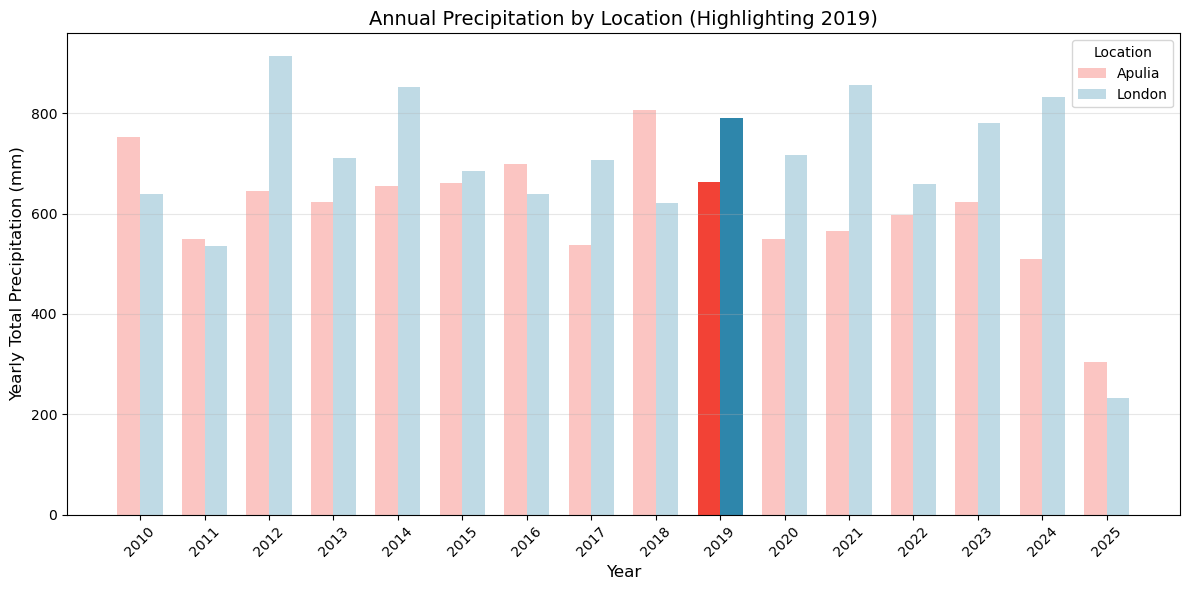

In [12]:
selected_year = 2019

plot_highlighted_bars_seaborn(df_plot=df_plot, selected_year = selected_year);

In [13]:
london_sum = np.int64(london_yearly_mean['yearly_tp_mm'].sum())
puglia_sum = np.int64(puglia_yearly_mean['yearly_tp_mm'].sum())

print(london_sum)
print(puglia_sum)


11170
9742


In [14]:
london_yearly_points[london_yearly_points['year'] == selected_year]['yearly_tp_mm'].mean()

789.6333333333332

In [15]:
puglia_yearly_points[(puglia_yearly_points['year'] == selected_year) &
                     (puglia_yearly_points['yearly_tp_mm'] > london_yearly_mean[london_yearly_mean['year'] == selected_year]['yearly_tp_mm'].values[0])].shape[0]

4

In [16]:
puglia_yearly_points[puglia_yearly_points['year'] == selected_year].sort_values('yearly_tp_mm')

,year,yearly_tp_mm,latitude,longitude,coordinates,coordinates_str
10,2019,502.2,40.3,17.6,"(40.299999999999976, 17.60000000000002)","40.299999999999976,17.60000000000002"
10,2019,509.0,41.4,15.8,"(41.39999999999999, 15.8)","41.39999999999999,15.8"
10,2019,511.5,41.4,15.9,"(41.39999999999999, 15.9)","41.39999999999999,15.9"
10,2019,520.8,41.4,15.7,"(41.39999999999999, 15.7)","41.39999999999999,15.7"
10,2019,526.5,41.4,16.0,"(41.39999999999999, 15.999999999999998)","41.39999999999999,15.999999999999998"
...,...,...,...,...,...,...
10,2019,788.8,40.9,16.3,"(40.899999999999984, 16.3)","40.899999999999984,16.3"
10,2019,797.2,40.3,18.4,"(40.299999999999976, 18.40000000000003)","40.299999999999976,18.40000000000003"
10,2019,806.0,40.2,18.4,"(40.2, 18.40000000000003)","40.2,18.40000000000003"
10,2019,807.7,41.2,15.3,"(41.19999999999999, 15.3)","41.19999999999999,15.3"


## Total Sum Comparison

We compare the mean total sum for London, with each point in the grid for Apulia region, investigating if there are sub region where the total precipitation is higher than the mean of total sum for London - starting from 2018.

In [17]:
puglia_yearly_points.head()

,year,yearly_tp_mm,latitude,longitude,coordinates,coordinates_str
1,2010,752.0,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
2,2011,518.8,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
3,2012,766.4,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
4,2013,639.0,41.9,15.4,"(41.9, 15.4)","41.9,15.4"
5,2014,734.1,41.9,15.4,"(41.9, 15.4)","41.9,15.4"


In [18]:
puglia_yearly_points.shape

(2832, 6)

In [19]:
(puglia_yearly_points
 .groupby('year')
 .agg(
     tp_mm_sum = ('yearly_tp_mm' , 'sum'),
     lat = ('latitude', 'first'),
     lon = ('longitude', 'first')
 )
 .reset_index()
)

,year,tp_mm_sum,lat,lon
0,2010,133259.6,41.9,15.4
1,2011,97126.9,41.9,15.4
2,2012,114229.8,41.9,15.4
3,2013,110379.2,41.9,15.4
4,2014,115819.3,41.9,15.4
5,2015,117097.1,41.9,15.4
6,2016,123681.1,41.9,15.4
7,2017,95236.1,41.9,15.4
8,2018,142591.2,41.9,15.4
9,2019,117222.2,41.9,15.4


In [20]:
puglia_yearly_points['coordinates'] = list(zip(puglia_yearly_points['latitude'], puglia_yearly_points['longitude']))
puglia_yearly_tp_per_point = (puglia_yearly_points
                              .groupby('coordinates')
                              .agg(
                                  tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                  lat = ('latitude', 'first'),
                                  lon = ('longitude', 'first')
                                  )
                                  .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                  ).reset_index().sort_values('tp_mm_sum')


london_yearly_points['coordinates'] = list(zip(london_yearly_points['latitude'], london_yearly_points['longitude']))
london_yearly_tp_per_point = (london_yearly_points
                              .groupby('coordinates')
                              .agg(
                                  tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                  lat = ('latitude', 'first'),
                                  lon = ('longitude', 'first')
                                  )
                                  .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                  ).reset_index()

In [21]:
# Option 0: base version

# def create_map_with_comparison(df, tp_threshold, zoom_start = 8.5, min_zoom = 8.5):
#     ''' 
#     This function create a folium map with circles 
#     denoting the points in the grid for the measured total precipitation.
#     In blue, the visualized points are above the tp_threshold, red below
#     '''

#     # Create a base map centered on your data
#     center_lat = df['latitude'].mean()
#     center_lon = df['longitude'].mean()
#     m = folium.Map(location=[center_lat, center_lon], 
#                 zoom_start=zoom_start,
#                 min_zoom= min_zoom)

#     # Define color mapping based on tp_mm values
#     def get_color(tp_mm_value, compared_value):
#         if tp_mm_value > compared_value:
#             return 'blue'
#         else:
#             return 'red'

#     # Add circles to the map
#     for idx, row in df.iterrows():
#         folium.CircleMarker(
#             location=[row['latitude'], row['longitude']],
#             radius=8,
#             popup=f"tp_mm: {row['tp_mm_sum']}",
#             color=get_color(row['tp_mm_sum'], tp_threshold),
#             fill=True,
#             fillColor=get_color(row['tp_mm_sum'], tp_threshold),
#             fillOpacity=0.7
#         ).add_to(m)

#     # Display the map
#     return(m)

# create_map_with_comparison(puglia_yearly_tp_per_point, london_sum, max_radius=20)

In [22]:
# option1: Scale marker radius based on data range
# currently used 
# def create_map_with_comparison(df, tp_threshold, zoom_start=8.5, min_zoom=8.5, 
#                               min_radius=3, max_radius=15):
#     ''' 
#     This function create a folium map with circles 
#     denoting the points in the grid for the measured total precipitation.
#     In blue, the visualized points are above the tp_threshold, red below.
#     Marker size is scaled based on the data range.
#     '''
    
#     # Create a base map centered on your data
#     center_lat = df['latitude'].mean()
#     center_lon = df['longitude'].mean()
#     m = folium.Map(location=[center_lat, center_lon], 
#                 zoom_start=zoom_start,
#                 min_zoom=min_zoom)

#     # Get min and max values for scaling
#     min_val = df['tp_mm_sum'].min()
#     max_val = df['tp_mm_sum'].max()
#     value_range = max_val - min_val
    
#     # Define color mapping based on tp_mm values
#     def get_color(tp_mm_value, compared_value):
#         if tp_mm_value > compared_value:
#             return 'blue'
#         else:
#             return 'red'
    
#     # Function to scale radius based on value
#     def get_radius(value, min_val, max_val, min_radius, max_radius):
#         if value_range == 0:  # Handle case where all values are the same
#             return (min_radius + max_radius) / 2
#         normalized = (value - min_val) / value_range
#         return min_radius + normalized * (max_radius - min_radius)

#     # Add circles to the map
#     for idx, row in df.iterrows():
#         radius = get_radius(row['tp_mm_sum'], min_val, max_val, min_radius, max_radius)
        
#         folium.CircleMarker(
#             location=[row['latitude'], row['longitude']],
#             radius=radius,
#             popup=f"tp_mm: {row['tp_mm_sum']} (min: {min_val:.2f}, max: {max_val:.2f})",
#             color=get_color(row['tp_mm_sum'], tp_threshold),
#             fill=True,
#             fillColor=get_color(row['tp_mm_sum'], tp_threshold),
#             fillOpacity=0.7
#         ).add_to(m)

#     return m

create_map_with_comparison(puglia_yearly_tp_per_point, london_sum, max_radius=20)

## Process automation

- `selected_year` == None
- `selected_year` != None

In [16]:
puglia_yearly_points

,year,yearly_tp_mm,latitude,longitude,coordinates
1,2018,792.1,41.9,15.4,"(41.9, 15.4)"
2,2019,600.4,41.9,15.4,"(41.9, 15.4)"
3,2020,525.3,41.9,15.4,"(41.9, 15.4)"
4,2021,555.8,41.9,15.4,"(41.9, 15.4)"
5,2022,565.0,41.9,15.4,"(41.9, 15.4)"
...,...,...,...,...,...
4,2021,552.9,41.7,15.5,"(41.7, 15.5)"
5,2022,620.7,41.7,15.5,"(41.7, 15.5)"
6,2023,722.0,41.7,15.5,"(41.7, 15.5)"
7,2024,518.8,41.7,15.5,"(41.7, 15.5)"


In [ ]:
selected_year = None

if(selected_year == None):
    london_sum = london_yearly_mean['yearly_tp_mm'].sum()
    
    puglia_yearly_tp_per_point = (puglia_yearly_points
                              .groupby('coordinates')
                              .agg(
                                  tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                  lat = ('latitude', 'first'),
                                  lon = ('longitude', 'first')
                                  )
                                  .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                  ).reset_index()
    london_yearly_tp_per_point = (london_yearly_points
                                  .groupby('coordinates')
                                  .agg(
                                      tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                      lat = ('latitude', 'first'),
                                      lon = ('longitude', 'first')
                                      )
                                      .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                      ).reset_index()    
else:
    london_sum = london_yearly_mean[london_yearly_mean['year'] == selected_year]['yearly_tp_mm'].values[0]

    puglia_yearly_tp_per_point = (puglia_yearly_points[puglia_yearly_points['year'] == selected_year]
                            .groupby('coordinates')
                            .agg(
                                tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                lat = ('latitude', 'first'),
                                lon = ('longitude', 'first')
                                )
                                .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                ).reset_index()
    
    london_yearly_tp_per_point = (london_yearly_points[london_yearly_points['year'] == selected_year]
                            .groupby('coordinates')
                            .agg(
                                tp_mm_sum = ('yearly_tp_mm', 'sum'),
                                lat = ('latitude', 'first'),
                                lon = ('longitude', 'first')
                                )
                                .rename(columns={'lat' : 'latitude', 'lon' : 'longitude'})
                                ).reset_index()
    

m_puglia = create_map_with_comparison(puglia_yearly_tp_per_point, london_sum, max_radius=20)
m_london = create_map_with_comparison(london_yearly_tp_per_point, 0,  zoom_start=11, min_zoom=11, max_radius=60)

# m


In [ ]:
m_puglia

In [ ]:
### London visualization

In [ ]:
london_yearly_points

In [ ]:
create_map_with_comparison(london_yearly_tp_per_point, 0,  zoom_start=11, min_zoom=11, max_radius=60)

In [ ]:
# Option 2: Use different marker types based on quantiles

# def create_map_with_comparison(df, tp_threshold, zoom_start=8.5, min_zoom=8.5):
#     ''' 
#     This function create a folium map with different marker types
#     based on quantiles of the data distribution.
#     '''
    
#     # Create a base map centered on your data
#     center_lat = df['latitude'].mean()
#     center_lon = df['longitude'].mean()
#     m = folium.Map(location=[center_lat, center_lon], 
#                 zoom_start=zoom_start,
#                 min_zoom=min_zoom)

#     # Calculate quantiles
#     q25 = df['tp_mm_sum'].quantile(0.25)
#     q50 = df['tp_mm_sum'].quantile(0.50)
#     q75 = df['tp_mm_sum'].quantile(0.75)
    
#     # Define color mapping based on tp_mm values
#     def get_color(tp_mm_value, compared_value):
#         if tp_mm_value > compared_value:
#             return 'blue'
#         else:
#             return 'red'
    
#     # Function to get marker size based on quantile
#     def get_marker_props(value):
#         if value <= q25:
#             return {'radius': 4, 'weight': 1}
#         elif value <= q50:
#             return {'radius': 6, 'weight': 2}
#         elif value <= q75:
#             return {'radius': 8, 'weight': 3}
#         else:
#             return {'radius': 10, 'weight': 4}

#     # Add circles to the map
#     for idx, row in df.iterrows():
#         marker_props = get_marker_props(row['tp_mm_sum'])
        
#         folium.CircleMarker(
#             location=[row['latitude'], row['longitude']],
#             radius=marker_props['radius'],
#             popup=f"tp_mm: {row['tp_mm_sum']} (Q1: {q25:.2f}, Q2: {q50:.2f}, Q3: {q75:.2f})",
#             color=get_color(row['tp_mm_sum'], tp_threshold),
#             fill=True,
#             fillColor=get_color(row['tp_mm_sum'], tp_threshold),
#             fillOpacity=0.7,
#             weight=marker_props['weight']
#         ).add_to(m)

#     return m

In [ ]:
# create_map_with_comparison(puglia_yearly_tp_per_point, london_sum)

In [ ]:
# Option 3: Color gradient based on normalized values

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def create_map_with_comparison(df, tp_threshold, zoom_start=8.5, min_zoom=8.5):
    ''' 
    This function create a folium map with color gradient
    based on normalized precipitation values.
    '''
    
    # Create a base map centered on your data
    center_lat = df['latitude'].mean()
    center_lon = df['longitude'].mean()
    m = folium.Map(location=[center_lat, center_lon], 
                zoom_start=zoom_start,
                min_zoom=min_zoom)

    # Normalize values to 0-1 range
    min_val = df['tp_mm_sum'].min()
    max_val = df['tp_mm_sum'].max()
    df_normalized = (df['tp_mm_sum'] - min_val) / (max_val - min_val) if max_val != min_val else 0.5
    
    # Create colormap
    cmap = plt.cm.RdYlBu_r  # Red-Yellow-Blue colormap
    
    def get_color_from_value(normalized_value):
        rgba = cmap(normalized_value)
        return mcolors.to_hex(rgba)
    
    # Threshold indicator (border color)
    def get_border_color(tp_mm_value, compared_value):
        return 'black' if tp_mm_value > compared_value else 'white'

    # Add circles to the map
    for idx, row in df.iterrows():
        normalized_val = df_normalized.iloc[idx] if hasattr(df_normalized, 'iloc') else df_normalized
        
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=8,
            popup=f"tp_mm: {row['tp_mm_sum']} (normalized: {normalized_val:.2f})",
            color=get_border_color(row['tp_mm_sum'], tp_threshold),
            fill=True,
            fillColor=get_color_from_value(normalized_val),
            fillOpacity=0.8,
            weight=2
        ).add_to(m)

    return m

create_map_with_comparison(puglia_yearly_tp_per_point, london_sum)

In [ ]:
def plot_highlighted_bars(df_plot, selected_year=2018, figsize=(12, 6)):
    """
    Create a bar chart with selected year highlighted and others grayed out.
    
    Parameters:
    - df_plot: DataFrame with columns 'year', 'yearly_tp_mm', 'location'
    - selected_year: Year to highlight (default: 2018)
    - figsize: Figure size tuple (default: (12, 6))
    """
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define colors for locations
    colors = {'london': '#2E86AB', 'apulia': '#F24236'}
    
    # Get unique years and locations
    years = sorted(df_plot['year'].unique())
    locations = sorted(df_plot['location'].unique())
    
    # Calculate bar width and positions
    bar_width = 0.35
    x_positions = np.arange(len(years))
    
    # Plot bars for each location
    for i, location in enumerate(locations):
        location_data = df_plot[df_plot['location'] == location]
        
        # Get y values for each year (fill missing years with 0)
        y_values = []
        alphas = []
        
        for year in years:
            year_data = location_data[location_data['year'] == year]
            if not year_data.empty:
                y_values.append(year_data['yearly_tp_mm'].iloc[0])
            else:
                y_values.append(0)
            
            # Set alpha based on whether it's the selected year
            alphas.append(1.0 if year == selected_year else 0.3)
        
        # Calculate x positions for this location
        x_pos = x_positions + (i - 0.5) * bar_width
        
        # Plot bars with different alphas
        bars = ax.bar(x_pos, y_values, bar_width, 
                     label=location.capitalize(), 
                     color=colors[location], 
                     alpha=1.0)  # We'll set individual alphas below
        
        # Set individual alpha for each bar
        for bar, alpha in zip(bars, alphas):
            bar.set_alpha(alpha)
    
    # Customize the plot
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Yearly Total Precipitation (mm)', fontsize=12)
    ax.set_title(f'Annual Precipitation by Location (Highlighting {selected_year})', fontsize=14)
    
    # Set x-axis
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years, rotation=45)
    
    # Add legend
    ax.legend(title='Location', loc='upper right')
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax

# Alternative approach using seaborn with custom styling
def plot_highlighted_bars_seaborn(df_plot, selected_year=2018, figsize=(12, 6)):
    """
    Create a bar chart using seaborn with manual highlighting.
    """
    
    # Create a copy of the dataframe with highlight information
    df_styled = df_plot.copy()
    df_styled['highlight'] = df_styled['year'] == selected_year
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define colors
    colors = {'london': '#2E86AB', 'apulia': '#F24236'}
    
    # Plot highlighted and non-highlighted bars separately
    for location in df_styled['location'].unique():
        location_data = df_styled[df_styled['location'] == location]
        
        # Non-highlighted bars (grayed out)
        non_highlight = location_data[~location_data['highlight']]
        if not non_highlight.empty:
            sns.barplot(data=non_highlight, x='year', y='yearly_tp_mm', 
                       color=colors[location], alpha=0.3, ax=ax)
        
        # Highlighted bars (full color)
        highlight = location_data[location_data['highlight']]
        if not highlight.empty:
            sns.barplot(data=highlight, x='year', y='yearly_tp_mm', 
                       color=colors[location], alpha=1.0, ax=ax)
    
    # This approach has limitations with side-by-side bars in seaborn
    # So let's use the matplotlib approach which is more flexible
    
    plt.close(fig)  # Close this figure and use the matplotlib approach
    return plot_highlighted_bars(df_plot, selected_year, figsize)


In [ ]:
plot_highlighted_bars_seaborn(df_plot=df_plot, selected_year=2022);

In [ ]:
year = 2019

min, max = location_year_min_max(london_yearly_points, year)